In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"

In [3]:
!wget $data -O airline.csv

--2022-09-29 15:06:39--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline.csv’

airline.csv         100%[===================>]   2.13K  --.-KB/s    in 0s      

2022-09-29 15:06:40 (23.9 MB/s) - ‘airline.csv’ saved [2180/2180]



In [4]:
df = pd.read_csv("airline.csv", parse_dates=[0])
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
df.set_index("Month", inplace=True)

Text(0, 0.5, 'Passengers')

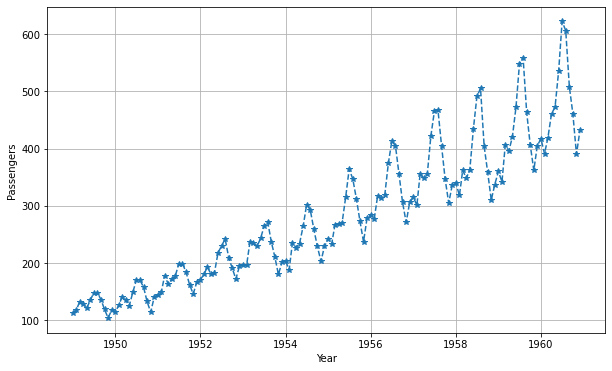

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df.Passengers, '--', marker="*")
plt.grid()
plt.xlabel("Year")
plt.ylabel("Passengers")

In [7]:
df.isnull().sum()

Passengers    0
dtype: int64

In [8]:
df_copy = df.copy()

In [9]:
rows = df_copy.sample(frac=0.1, random_state=0)

In [10]:
rows

,Passengers
Month,
1949-08-01,148
1956-06-01,374
1957-02-01,301
1951-03-01,178
1958-03-01,362
1959-09-01,463
1953-12-01,201
1950-11-01,114
1959-10-01,407


In [11]:
rows["Passengers"] = np.nan

In [12]:
df_copy.loc[rows.index, "Passengers"] = rows.Passengers

In [13]:
df_copy.isnull().sum()

Passengers    14
dtype: int64

In [14]:
# Filling Missing data by interpolation
df_copy_LIF = df_copy.interpolate(method='linear', limit_direction='forward')

In [15]:
df_copy_LIF.isnull().sum()

Passengers    0
dtype: int64

In [16]:
df_quarterly = df.resample("3M").mean()
df_quarterly

,Passengers
Month,
1949-01-31,112.000000
1949-04-30,126.333333
1949-07-31,134.666667
1949-10-31,134.333333
1950-01-31,112.333333
1950-04-30,134.000000
1950-07-31,148.000000
1950-10-31,153.666667
1951-01-31,133.000000


In [17]:
df_daily = df.resample("D").mean()
df_daily

,Passengers
Month,
1949-01-01,112.0
1949-01-02,NaN
1949-01-03,NaN
1949-01-04,NaN
1949-01-05,NaN
...,...
1960-11-27,NaN
1960-11-28,NaN
1960-11-29,NaN


In [18]:
df_copy["Passengers"].rolling(12).mean()

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01           NaN
1960-09-01           NaN
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Name: Passengers, Length: 144, dtype: float64

In [19]:
import statsmodels.api as sm
from pylab import rcParams

In [20]:
rcParams['figure.figsize'] = (15, 8)

In [21]:
decompose_series = sm.tsa.seasonal_decompose(
  df["Passengers"], model="multiplicative"
)

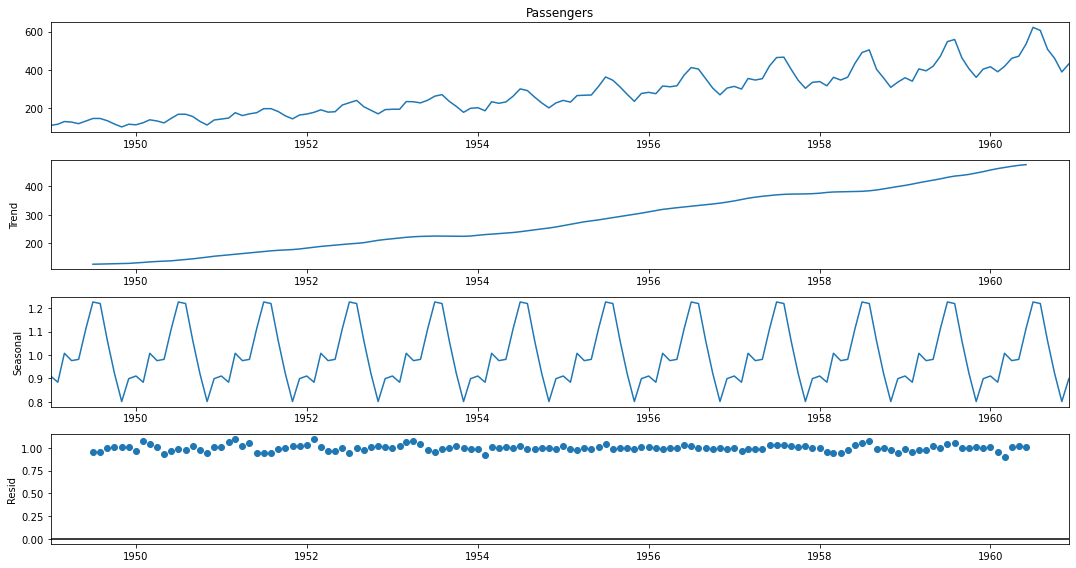

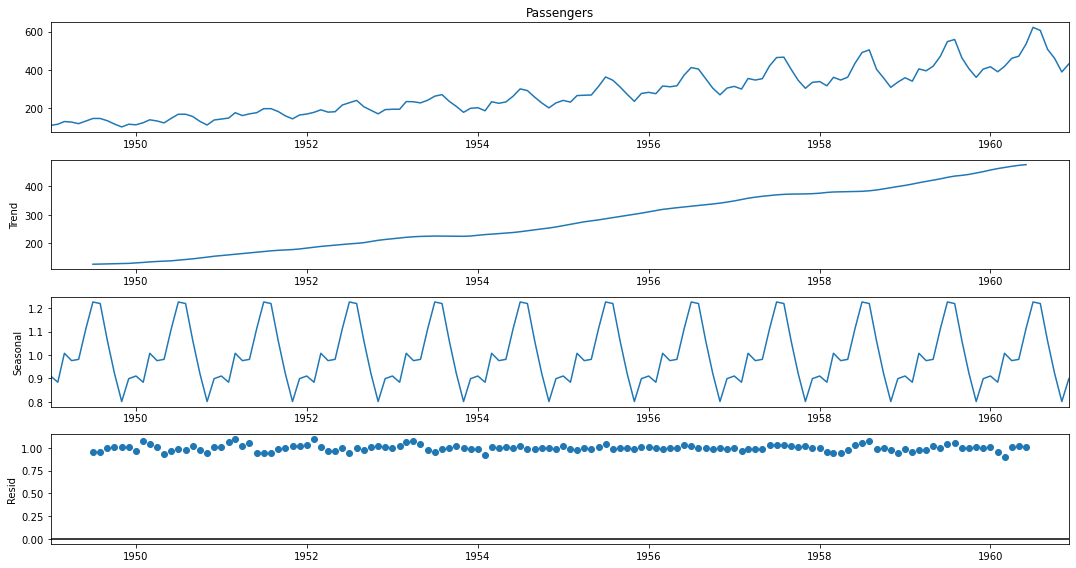

In [22]:
decompose_series.plot()

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
adf_result = adfuller(df['Passengers'])
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"No. of lags used: {adf_result[2]}")
print(f"No. of observations used: {adf_result[3]}")
print("Critical Values")
for k, v in adf_result[4].items():
  print(f"  {k}:{v}")

ADF Statistic: 0.8153688792060423
p-value: 0.9918802434376409
No. of lags used: 13
No. of observations used: 130
Critical Values
  1%:-3.4816817173418295
  5%:-2.8840418343195267
  10%:-2.578770059171598


In [25]:
adf_result

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [26]:
df_log = np.log(df)
df_diff = df_log.diff(periods=1)

In [27]:
df_diff

,Passengers
Month,
1949-01-01,NaN
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
...,...
1960-08-01,-0.026060
1960-09-01,-0.176399
1960-10-01,-0.097083


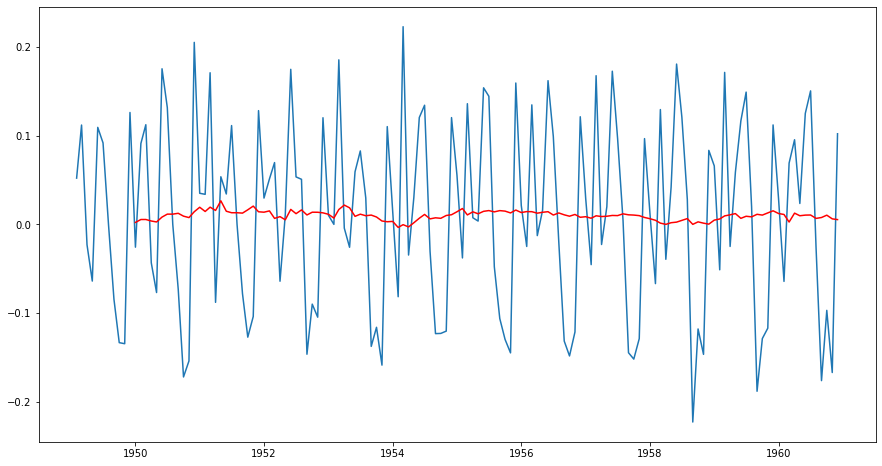

In [28]:
plt.plot(
  df_diff.index, df_diff.Passengers, '-'
)
plt.plot(
  df_diff.rolling(12).mean(), color="red"
)

In [29]:
# df_diff.rolling(12).mean()

In [30]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/home/xviix/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/home/xviix/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


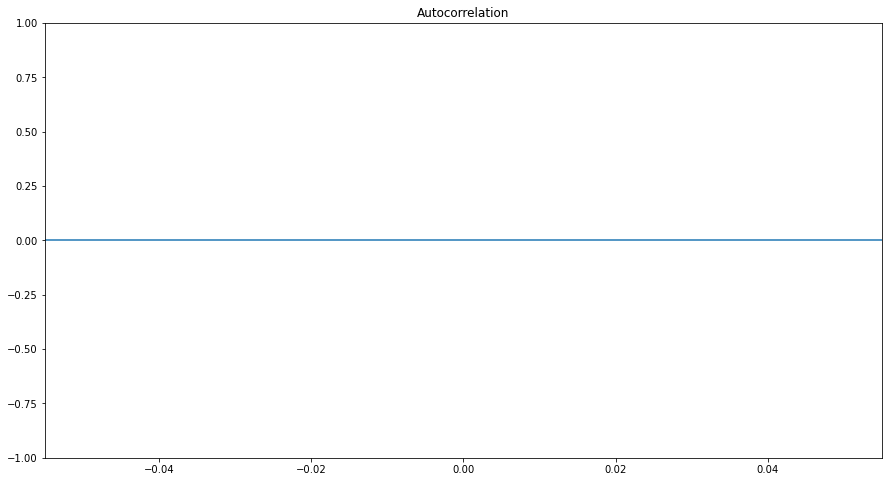

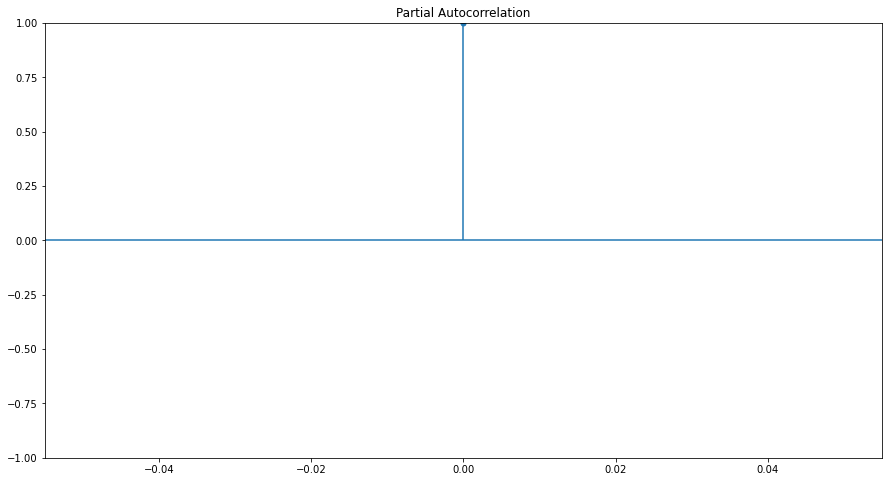

In [31]:
plot_acf(df_diff, lags = range(0, 20))
plot_pacf(df_diff, lags=range(0, 20))
plt.show()

In [32]:
from statsmodels.tsa.arima.model import ARIMA

ar_model = ARIMA(df_diff, order=(2, 0, 0))
ar_model_results = ar_model.fit()

/home/xviix/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/xviix/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/xviix/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


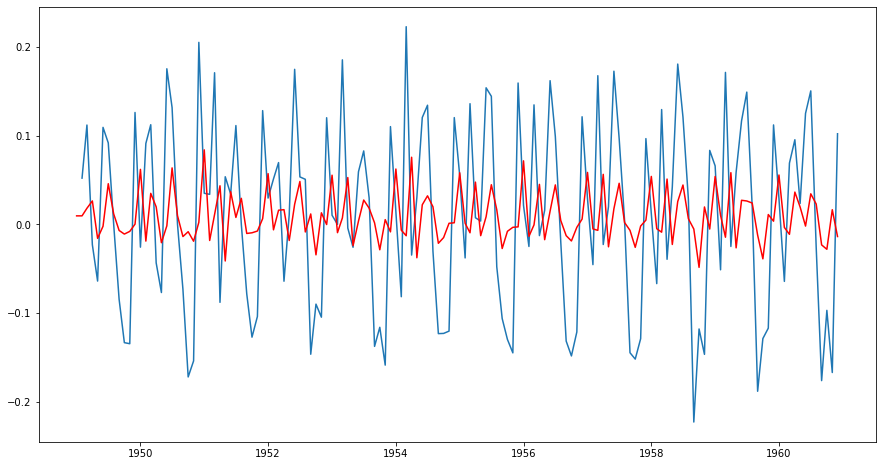

In [33]:
plt.plot(df_diff)
plt.plot(ar_model_results.fittedvalues, color='red')

/home/xviix/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/xviix/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/xviix/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


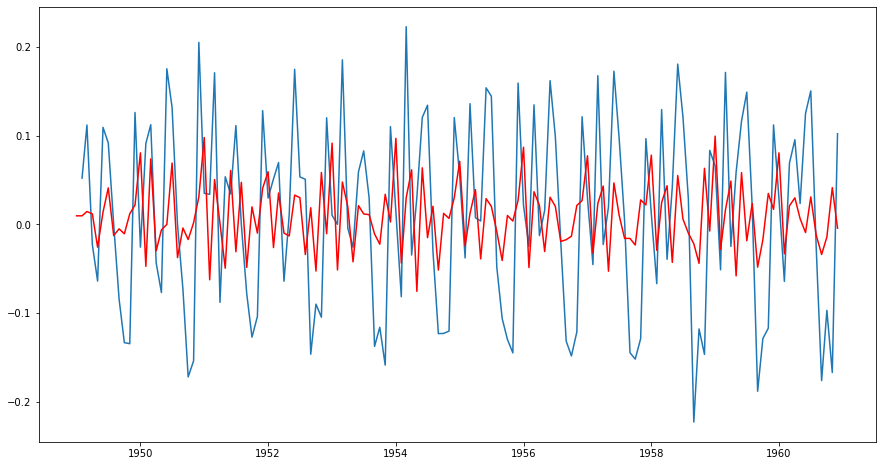

In [34]:
from statsmodels.tsa.arima.model import ARIMA

ar_model = ARIMA(df_diff, order=(0, 0, 2))
ar_model_results = ar_model.fit()
plt.plot(df_diff)
plt.plot(ar_model_results.fittedvalues, color='red')

/home/xviix/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/xviix/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/xviix/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/xviix/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


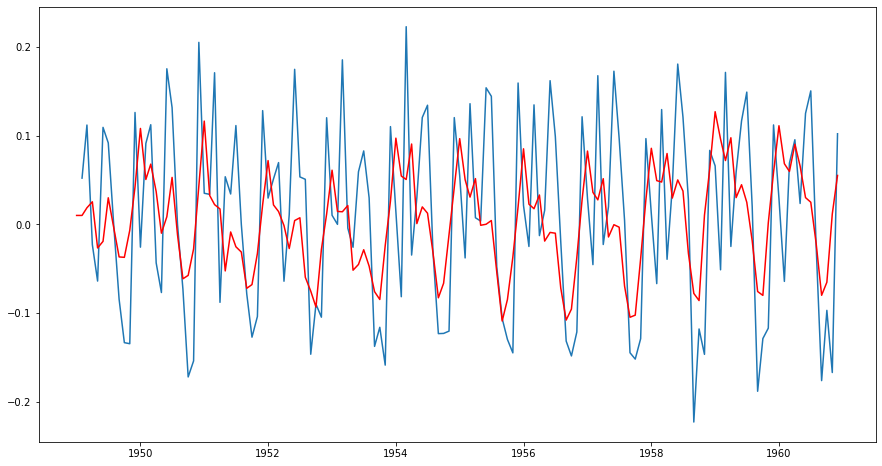

In [35]:
from statsmodels.tsa.arima.model import ARIMA

ar_model = ARIMA(df_diff, order=(2, 0, 1))
ar_model_results = ar_model.fit()
plt.plot(df_diff)
plt.plot(ar_model_results.fittedvalues, color='red')

In [36]:
from prophet import Prophet

In [37]:
df = pd.read_csv('airline.csv', parse_dates=[0])
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [38]:
df = df.rename(columns={
  'Month':'ds',
  'Passengers': 'y'
})

In [39]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [40]:
model = Prophet()
model.fit(df)

15:13:21 - cmdstanpy - INFO - Chain [1] start processing
15:13:22 - cmdstanpy - INFO - Chain [1] done processing


**Predict for the next 10 months**

In [41]:
future = model.make_future_dataframe(periods=10, freq="M")
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.199036,56.284168,113.343785,106.199036,106.199036,-21.964653,-21.964653,-21.964653,-21.964653,-21.964653,-21.964653,0.0,0.0,0.0,84.234383
1,1949-02-01,108.385288,47.947822,105.559611,108.385288,108.385288,-30.742163,-30.742163,-30.742163,-30.742163,-30.742163,-30.742163,0.0,0.0,0.0,77.643125
2,1949-03-01,110.359967,83.291201,139.493378,110.359967,110.359967,-0.494234,-0.494234,-0.494234,-0.494234,-0.494234,-0.494234,0.0,0.0,0.0,109.865733
3,1949-04-01,112.546219,79.298481,133.989002,112.546219,112.546219,-5.201420,-5.201420,-5.201420,-5.201420,-5.201420,-5.201420,0.0,0.0,0.0,107.344799
4,1949-05-01,114.661946,81.852345,139.444470,114.661946,114.661946,-3.802447,-3.802447,-3.802447,-3.802447,-3.802447,-3.802447,0.0,0.0,0.0,110.859499


In [42]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,1949-01-01,84.234383,56.284168,113.343785,106.199036,106.199036,106.199036
1,1949-02-01,77.643125,47.947822,105.559611,108.385288,108.385288,108.385288
2,1949-03-01,109.865733,83.291201,139.493378,110.359967,110.359967,110.359967
3,1949-04-01,107.344799,79.298481,133.989002,112.546219,112.546219,112.546219
4,1949-05-01,110.859499,81.852345,139.444470,114.661946,114.661946,114.661946
...,...,...,...,...,...,...,...
149,1961-05-31,533.924590,505.543394,560.501309,502.426356,502.234306,502.573337
150,1961-06-30,576.949410,548.323806,606.290717,505.434342,505.166767,505.623341
151,1961-07-31,575.362776,545.824585,604.139060,508.542595,508.224606,508.788516
152,1961-08-31,528.859010,499.416554,557.113911,511.650847,511.280028,511.964525


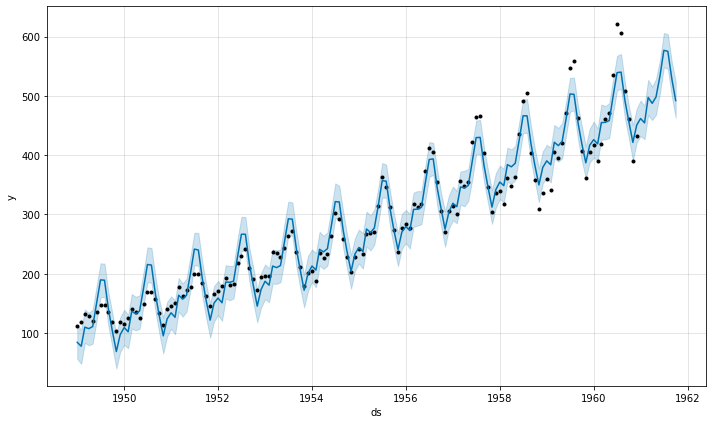

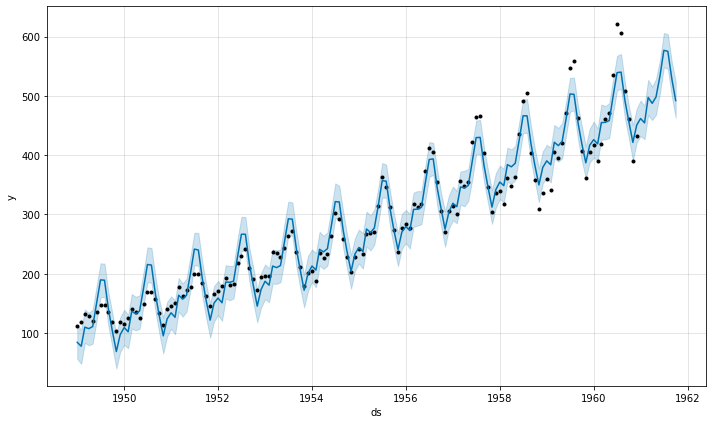

In [43]:
model.plot(forecast)